In [1]:
# import libraries
import torch
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# read data
df = pd.read_table('https://raw.githubusercontent.com/nhduc279/DL-notebooks/main/data/perceptron.txt', sep='\t', names=['X1', 'X2', 'y'])

# convert pandas series into numpy arrays
X = df[['X1', 'X2']].values
y = df['y'].values

# convert numpy arrays to tensors
X = torch.from_numpy(X)
y = torch.from_numpy(y)

# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## On-line mode

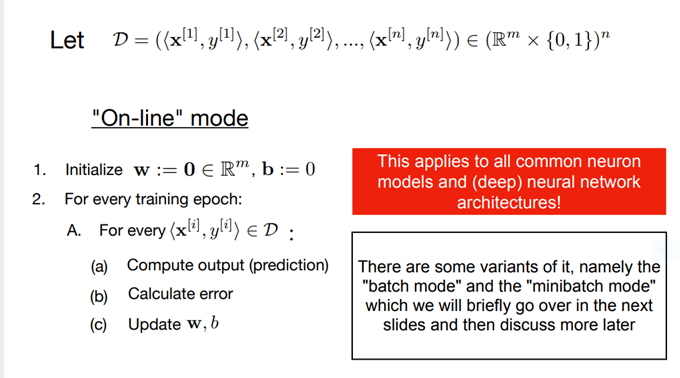

In [2]:
Image('On-line mode.PNG', width=500, height=100)

In [3]:
###################
##### On-line mode 
###################

# Implement Perceptron with On-line mode
class Perceptron_1():
    # initialize the number of features, weights and bias
    def __init__(self, n_features):
        self.n_features = n_features
        self.weights = torch.zeros(size=(n_features, 1), dtype=torch.double)
        self.bias = torch.zeros(size=(1, ), dtype=torch.double)
        
    # wx + b (1)
    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = torch.where(linear > 0., torch.tensor(1.), torch.tensor(0.))
        return predictions
    
    # compute errors (2)
    def backward(self, x, y):
        predictions = self.forward(x).reshape(-1)
        errors = y - predictions
        return errors

    # for every epoch implement (1) + (2) and update errors
    def fit(self, x, y, epochs):
        for epoch in range(epochs):
            for i in range(len(y)):
                errors = self.backward(x[i].view(1, self.n_features), y[i]).reshape(-1)
                self.weights = self.weights + (x[i]*errors).reshape(self.n_features, 1)
                self.bias = self.bias + errors
                
    # define 'evaluate' method
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions==y) / len(y)
        return accuracy

## Batch mode

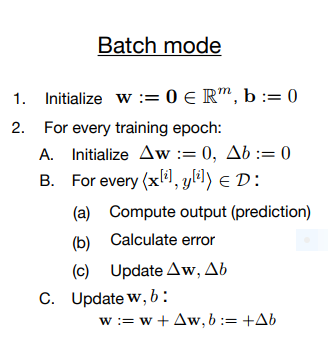

In [4]:
Image('Batch mode.PNG', width=300, height=100)

In [5]:
################
##### Batch mode 
################

# Implement Perceptron with the Batch mode
class Perceptron_2():
    def __init__(self, n_features):
        # initialize the number of features, weights and bias and *delta* weights and bias
        self.n_features = n_features
        self.del_weights = torch.zeros(size=(n_features, 1), dtype=torch.double)
        self.del_bias = torch.zeros(size=(1, ), dtype=torch.double)
        self.weights = torch.zeros(size=(n_features, 1), dtype=torch.double)
        self.bias = torch.zeros(size=(1, ), dtype=torch.double)

    # wx + b
    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = torch.where(linear > 0., torch.tensor(1.), torch.tensor(0.))
        return predictions
    
    # compute errors 
    def backward(self, x, y):
        predictions = self.forward(x).reshape(-1)
        errors = y - predictions
        return errors

    # define "fit" method
    def fit(self, x, y, epochs):
        for epoch in range(epochs):
            # after each epoch, update weights and bias from del_weights and del_bias
            self.weights = self.weights + self.del_weights
            self.bias = self.bias + self.del_bias
            
            # update del_weights and del_bias 
            for i in range(len(y)):
                errors = self.backward(x[i].view(1, self.n_features), y[i]).reshape(-1)
                self.del_weights = self.del_weights + (x[i]*errors).reshape(self.n_features, 1)
                self.del_bias = self.del_bias + errors
    
    # define "avaluate method"
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions==y) / len(y)
        return accuracy

## Minibatch mode

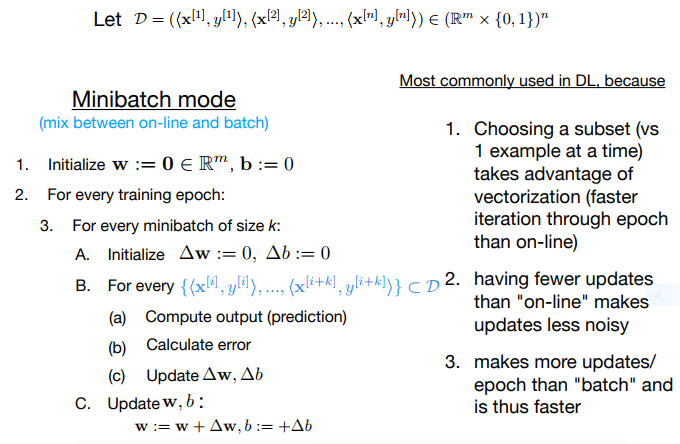

In [6]:
Image('Minibatch mode.PNG', height=50, width=500)

In [7]:
#####################
##### Minibatch mode 
#####################


# Implement Perceptron with the Minibatch mode
class Perceptron_3():
    def __init__(self, n_features):
        self.n_features = n_features
        self.del_weights = torch.zeros(size=(n_features, 1), dtype=torch.double)
        self.del_bias = torch.zeros(size=(1, ), dtype=torch.double)
        self.weights = torch.zeros(size=(n_features, 1), dtype=torch.double)
        self.bias = torch.zeros(size=(1, ), dtype=torch.double)

    # wx + b
    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = torch.where(linear > 0., torch.tensor(1.), torch.tensor(0.))
        return predictions
    
    # compute errors 
    def backward(self, x, y):
        predictions = self.forward(x).reshape(-1)
        errors = y - predictions
        return errors

    # define "fit" method
    def fit(self, x, y, epochs):
        # Loop through each epoch
        for epoch in range(epochs):
            
            # Choose subsets with steps=10
            for i in range(0, len(y), 10):
                # update weights and bias after each subset
                self.weights = self.weights + self.del_weights
                self.bias = self.bias + self.del_bias
                
                # update del_weights and del_bias
                for j in range(i, i+10, 10):
                    errors = self.backward(x[j].view(1, self.n_features), y[j]).reshape(-1)
                    self.del_weights = self.del_weights + (x[j]*errors).reshape(self.n_features, 1)
                    self.del_bias = self.del_bias + errors
                    
    # define "avaluate method"
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions==y) / len(y)
        return accuracy

## Fit the model with 3 different modes

In [8]:
# Perceptron with the On-line mode
ppn_1 = Perceptron_1(n_features=2)
ppn_1.fit(X_train, y_train, epochs=5)

# Perceptron with the Batch mode
ppn_2 = Perceptron_2(n_features=2)
ppn_2.fit(X_train, y_train, epochs=5)

# Perceptron with the Minibatch mode
ppn_3 = Perceptron_3(n_features=2)
ppn_3.fit(X_train, y_train, epochs=5)

## Compare results of 3 modes

In [9]:
# evaluate the On-line mode
print(f"- Accuracy of On-line mode: {ppn_1.evaluate(X_test, y_test).item()*100}%")
print(f"- Weights of On-line mode: {ppn_1.weights}")
print(f"- Bias of On-line mode: {ppn_1.bias}")

- Accuracy of On-line mode: 100.0%
- Weights of On-line mode: tensor([[3.4200],
        [1.3000]], dtype=torch.float64)
- Bias of On-line mode: tensor([-3.], dtype=torch.float64)


In [10]:
# evaluate the Batch mode
print(f"- Accuracy of Batch mode: {ppn_2.evaluate(X_test, y_test).item()*100}%")
print(f"- Weights  Batch mode mode: {ppn_2.weights}")
print(f"- Bias of Batch mode: {ppn_2.bias}")

- Accuracy of Batch mode: 92.00000166893005%
- Weights  Batch mode mode: tensor([[304.1000],
        [319.2200]], dtype=torch.float64)
- Bias of Batch mode: tensor([130.], dtype=torch.float64)


In [11]:
# Evaluate the Minibatch mode
print(f"- Accuracy of Minibatch mode: {ppn_3.evaluate(X_test, y_test).item()*100}%")
print(f"- Weights  Minibatch: {ppn_3.weights}")
print(f"- Bias of Minibatch mode: {ppn_3.bias}")

- Accuracy of Minibatch mode: 87.99999952316284%
- Weights  Minibatch: tensor([[64.3500],
        [24.5700]], dtype=torch.float64)
- Bias of Minibatch mode: tensor([39.], dtype=torch.float64)


## Using sckit-learn

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
ppn = Perceptron()
ppn.fit(X_train, y_train)

Perceptron()

In [14]:
ppn.fit(X_train, y_train)

Perceptron()

In [15]:
print(f'weights: {ppn.coef_}')
print(f'bias: {ppn.intercept_}')

weights: [[2.85 1.21]]
bias: [-3.]


In [16]:
accuracy_score(y_test, ppn.predict(X_test))

1.0

- Scikit-learn code is efficient and good for real-world problems! 